In [1]:
import os
import cv2
from torchvision import datasets
import torchvision
import torch
import imutils
from torchvision.transforms import transforms
import torchvision.models as models
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils.video import VideoStream
Image.LOAD_TRUNCATED_IMAGES = True
plt.ion()

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Fire_detection/

/content/drive/My Drive/Fire_detection


In [4]:
!ls

 dataset	     Propane_fire.mp4   trained-model
'Inference .ipynb'   test-imgs	        Training.ipynb


In [5]:
print("[INFO] loading model...")
model = torch.load('trained-model/model_final.pth')
#model.eval()

[INFO] loading model...


In [6]:
class_names = class_names = ['Fire', 'Neutral', 'Smoke']

def predict(image):
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    image = image.cuda()

    pred = model(image)
    idx = torch.argmax(pred)
    prob = pred[0][idx].item()*100
    
    return class_names[idx], prob

## Image

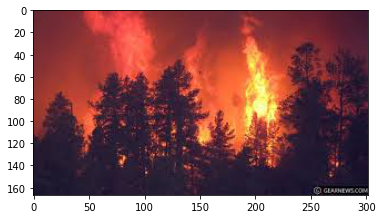

Fire 99.99909400939941


In [7]:
img = Image.open('test-imgs/image_14.jpg')
plt.imshow(img)
plt.show()

prediction, prob = predict(img)
print(prediction, prob)

## Video

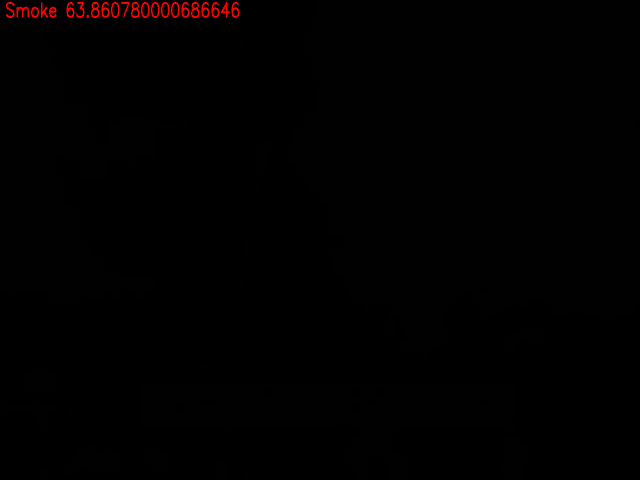

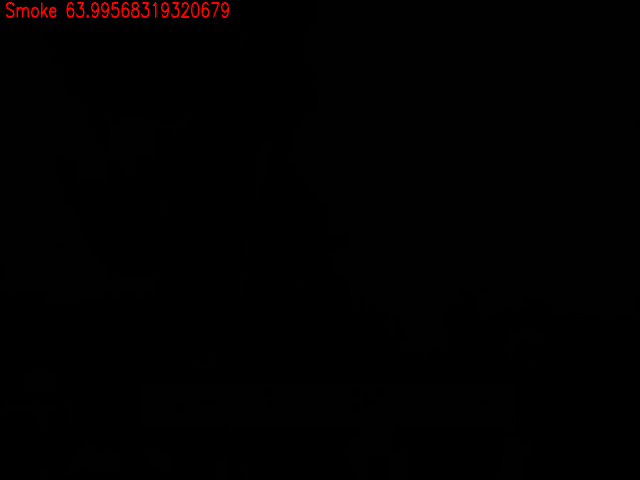

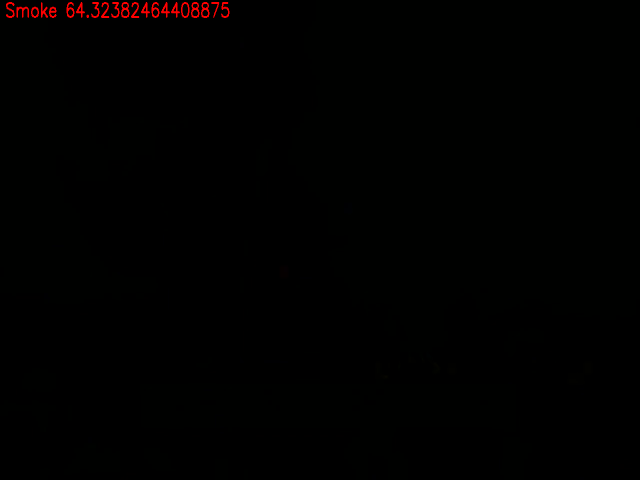

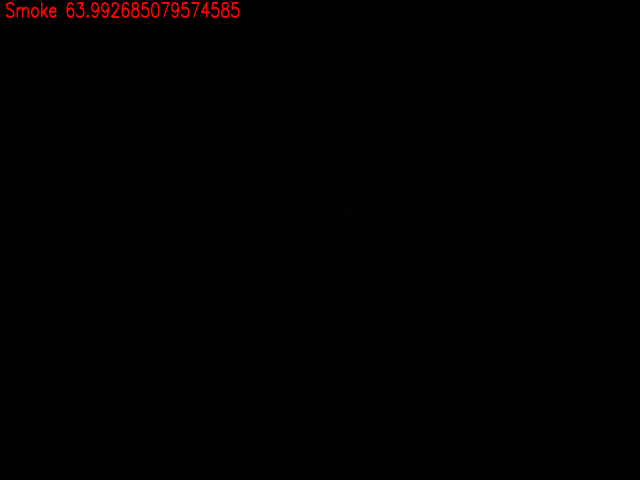

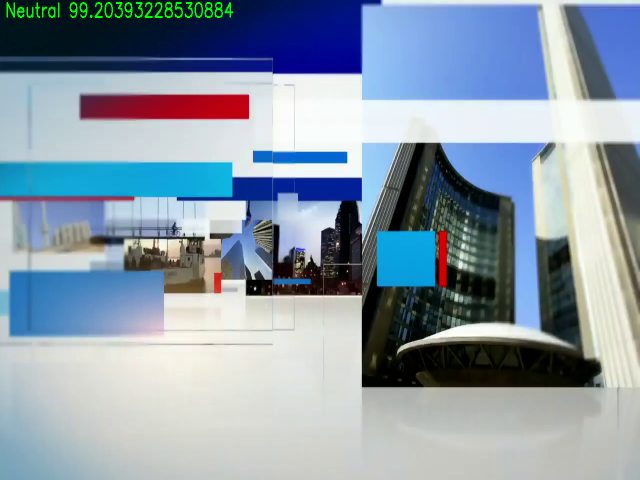

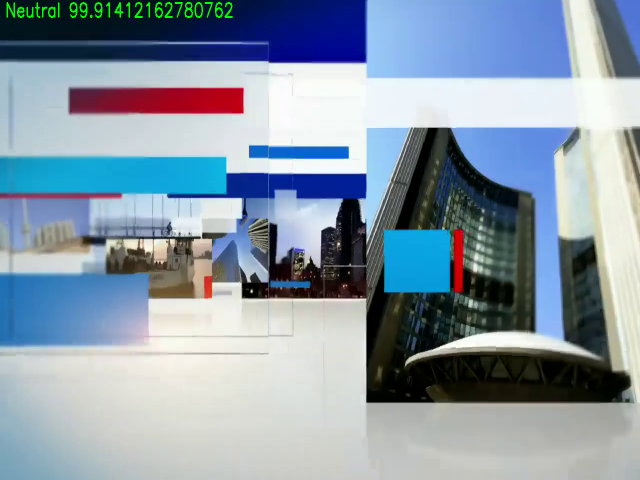

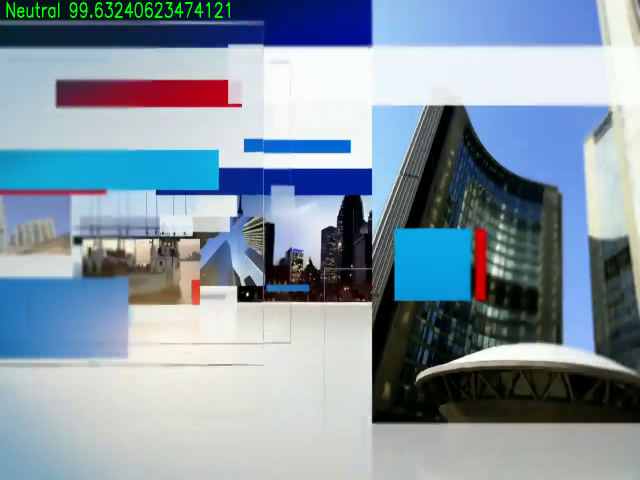

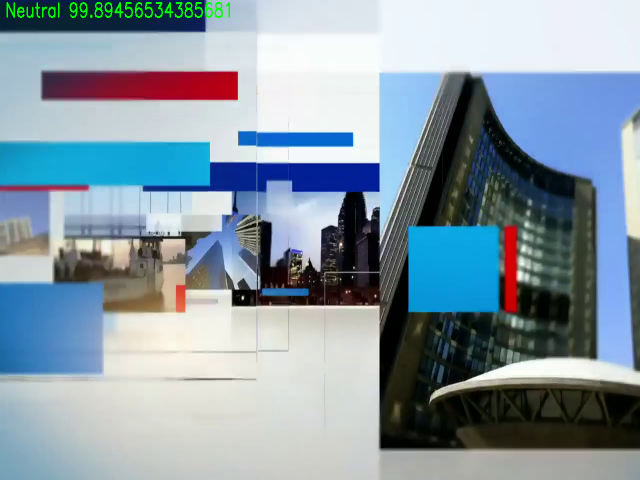

In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('Propane_fire.mp4')

while True:

    ret, image = cap.read()
    draw = image.copy()
    draw = cv2.resize(draw,(640,480))
    
    draw = transforms.ToPILImage()(draw)
    prediction, prob = predict(draw)
    
    if prediction == 'Neutral':
        color = (0, 255, 0)
    else:
        color = (0, 0, 255)
    cv2.putText(image, (prediction+' '+str(prob)), (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    

    #cv2.imshow('framename', image)
    cv2_imshow(cv2.resize(image,(640,480)))
        
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()